In [1]:
from dataset_UNSW_NB15 import Dataset_UNSW_NB15
from dataset_UNSW_NB15_1 import Dataset_UNSW_NB15_1
from dataset_NSL_KDD import Dataset_NSL_KDD
from dataset_IoT_NID import Dataset_IoT_NID
from experiment import Experiment
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)   


X_ohe shape is: 161
X_num shape is: 39
Accuracy: 0.59
Attack Accruracy: 0.6
Normal Accuracy: 0.67
F1 Score: 0.55
F1 Score Attack: 0.56
F1 Score Normal: 0.66
Fit Time: 3.24
Evaluate Time: 1.51


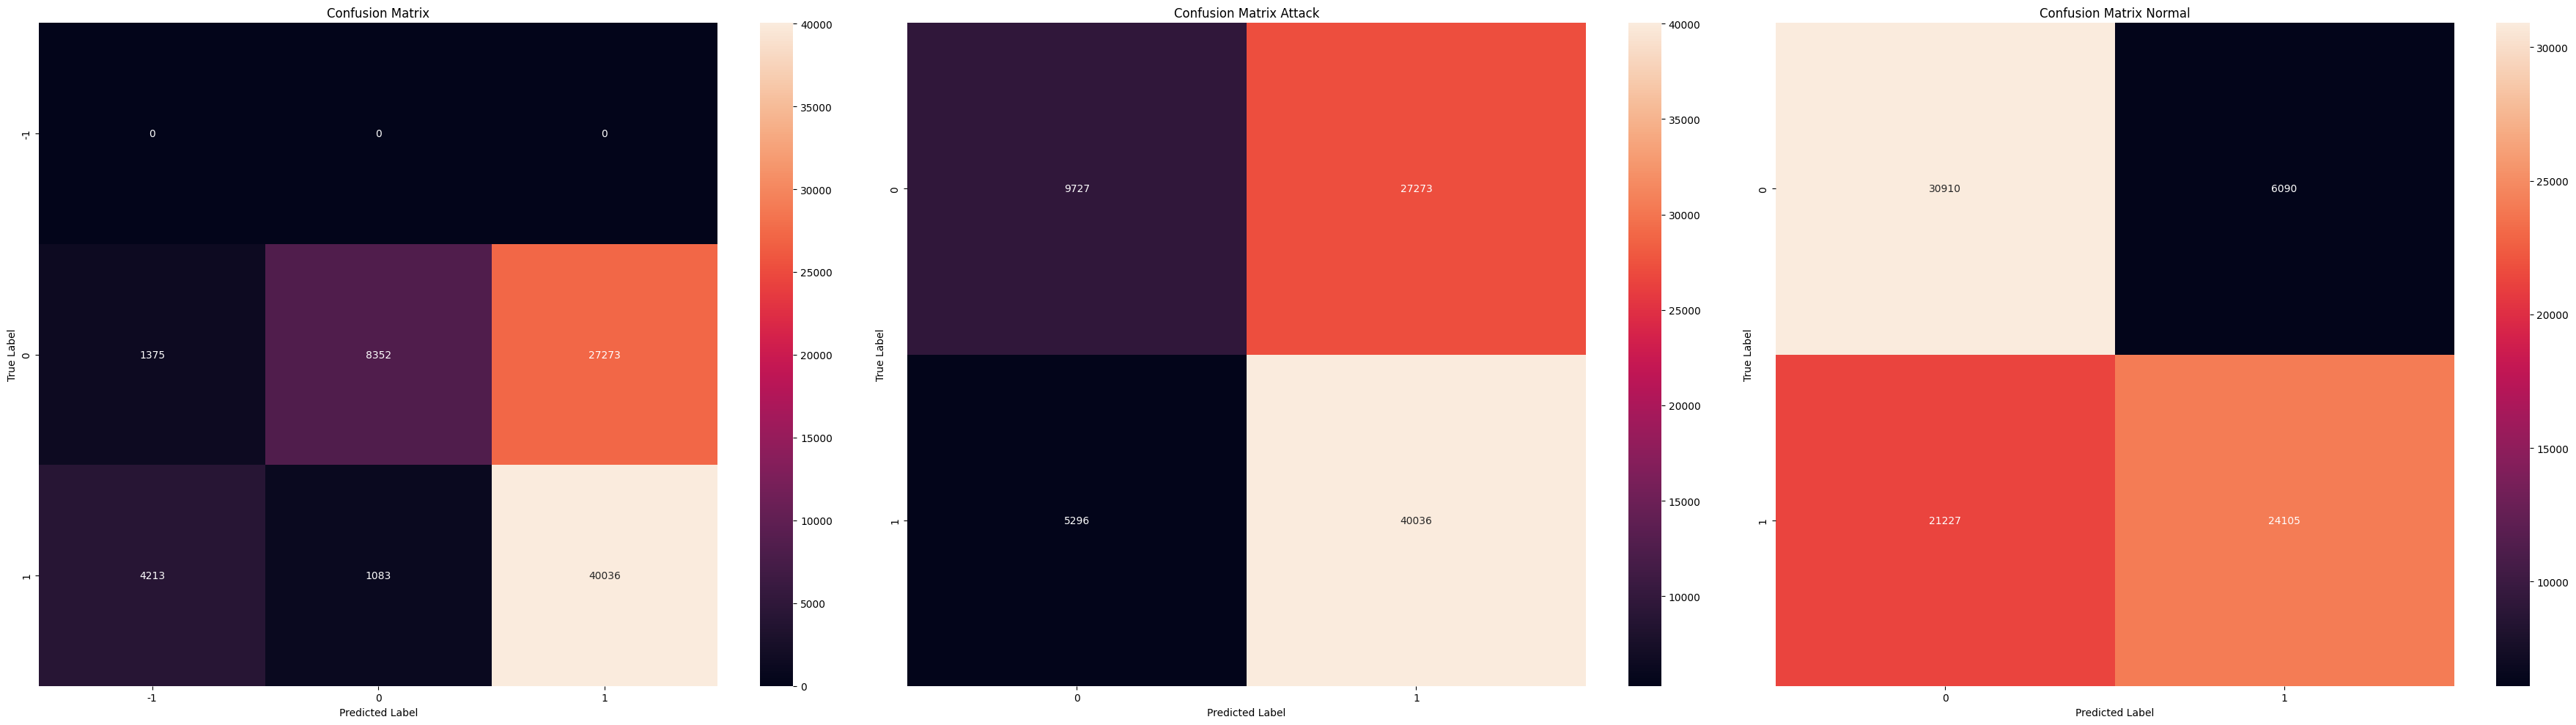

Accuracy: 0.47
Attack Accruracy: 0.52
Normal Accuracy: 0.6
F1 Score: 0.48
F1 Score Attack: 0.51
F1 Score Normal: 0.58
Fit Time: 7.9
Evaluate Time: 0.97


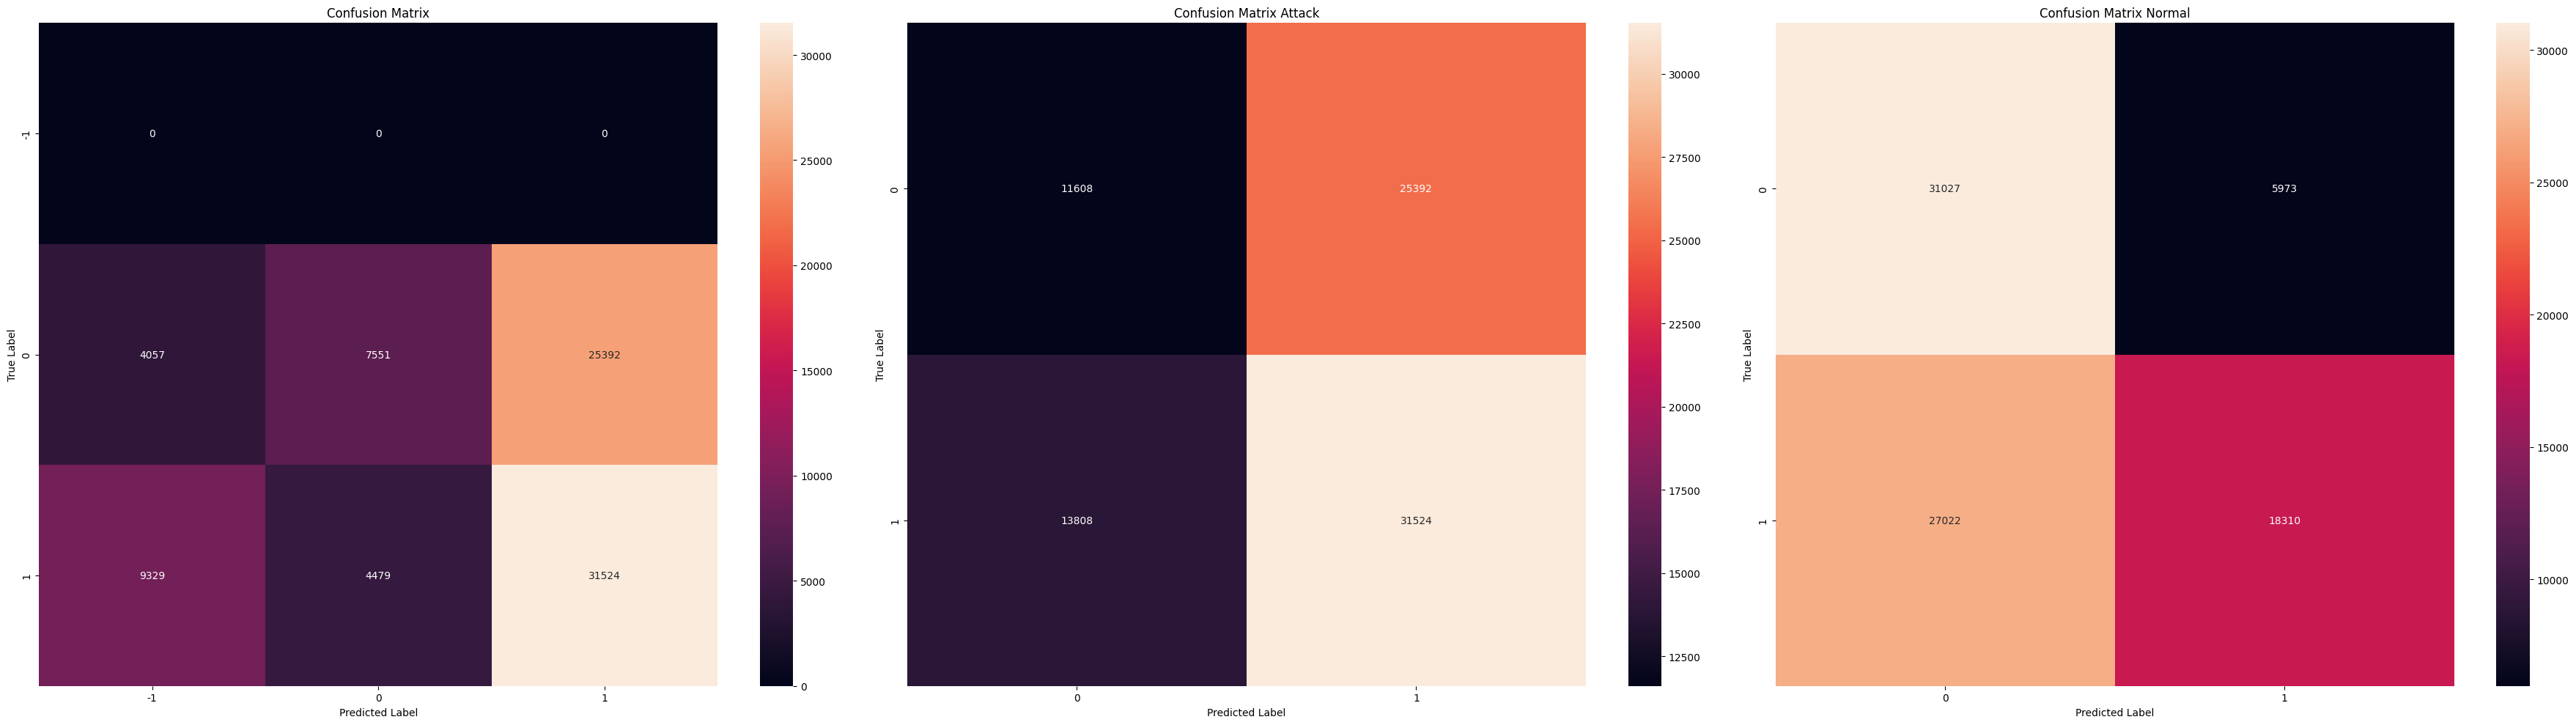

X_ohe shape is: 161
X_num shape is: 39


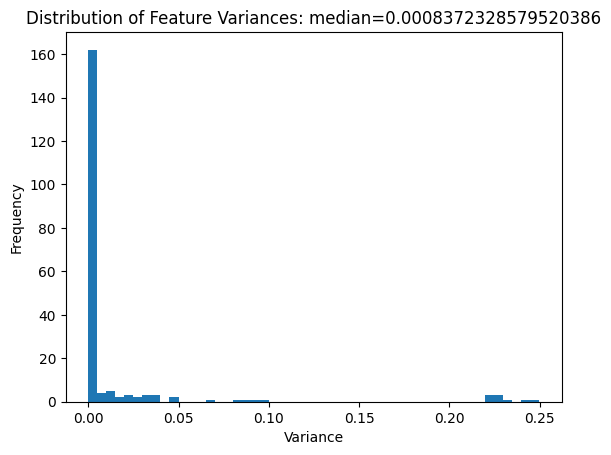

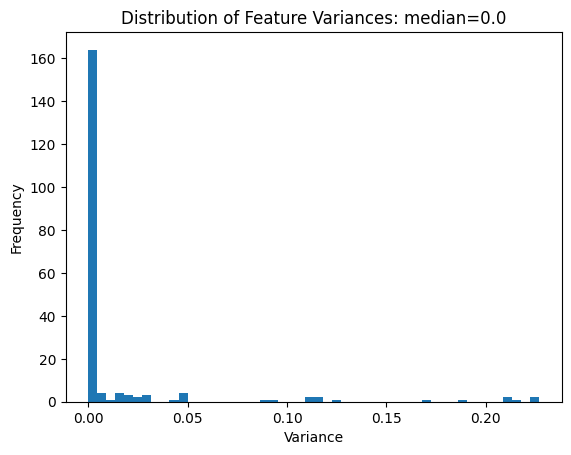

Accuracy: 0.63
Attack Accruracy: 0.65
Normal Accuracy: 0.68
F1 Score: 0.65
F1 Score Attack: 0.64
F1 Score Normal: 0.67
Fit Time: 4.17
Evaluate Time: 2.22


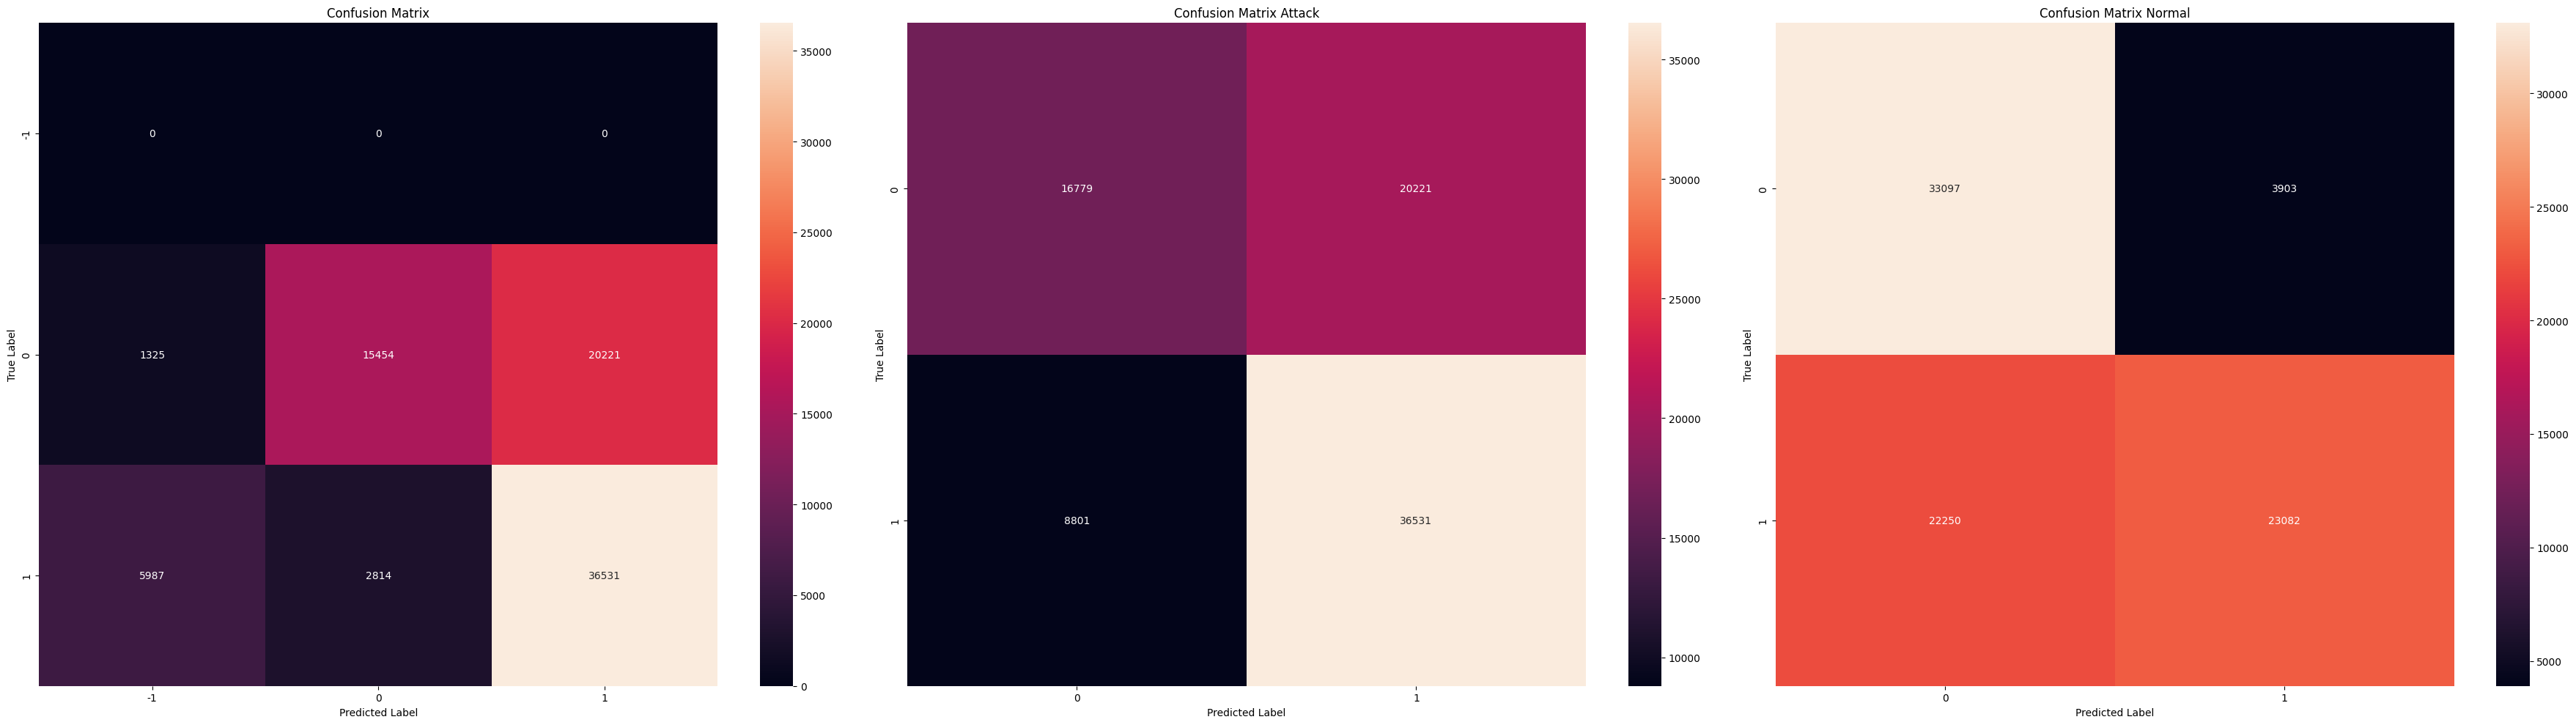

In [2]:
dataset = Dataset_UNSW_NB15(100000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=5000000000)
exp.run_hybrid(k=5000000, n_fi=40, n_pca=20)
exp.run_var(k=500000000)

X_ohe shape is: 92
X_num shape is: 35
Accuracy: 0.78
Attack Accruracy: 0.79
Normal Accuracy: 0.84
F1 Score: 0.81
F1 Score Attack: 0.79
F1 Score Normal: 0.84
Fit Time: 0.93
Evaluate Time: 0.27


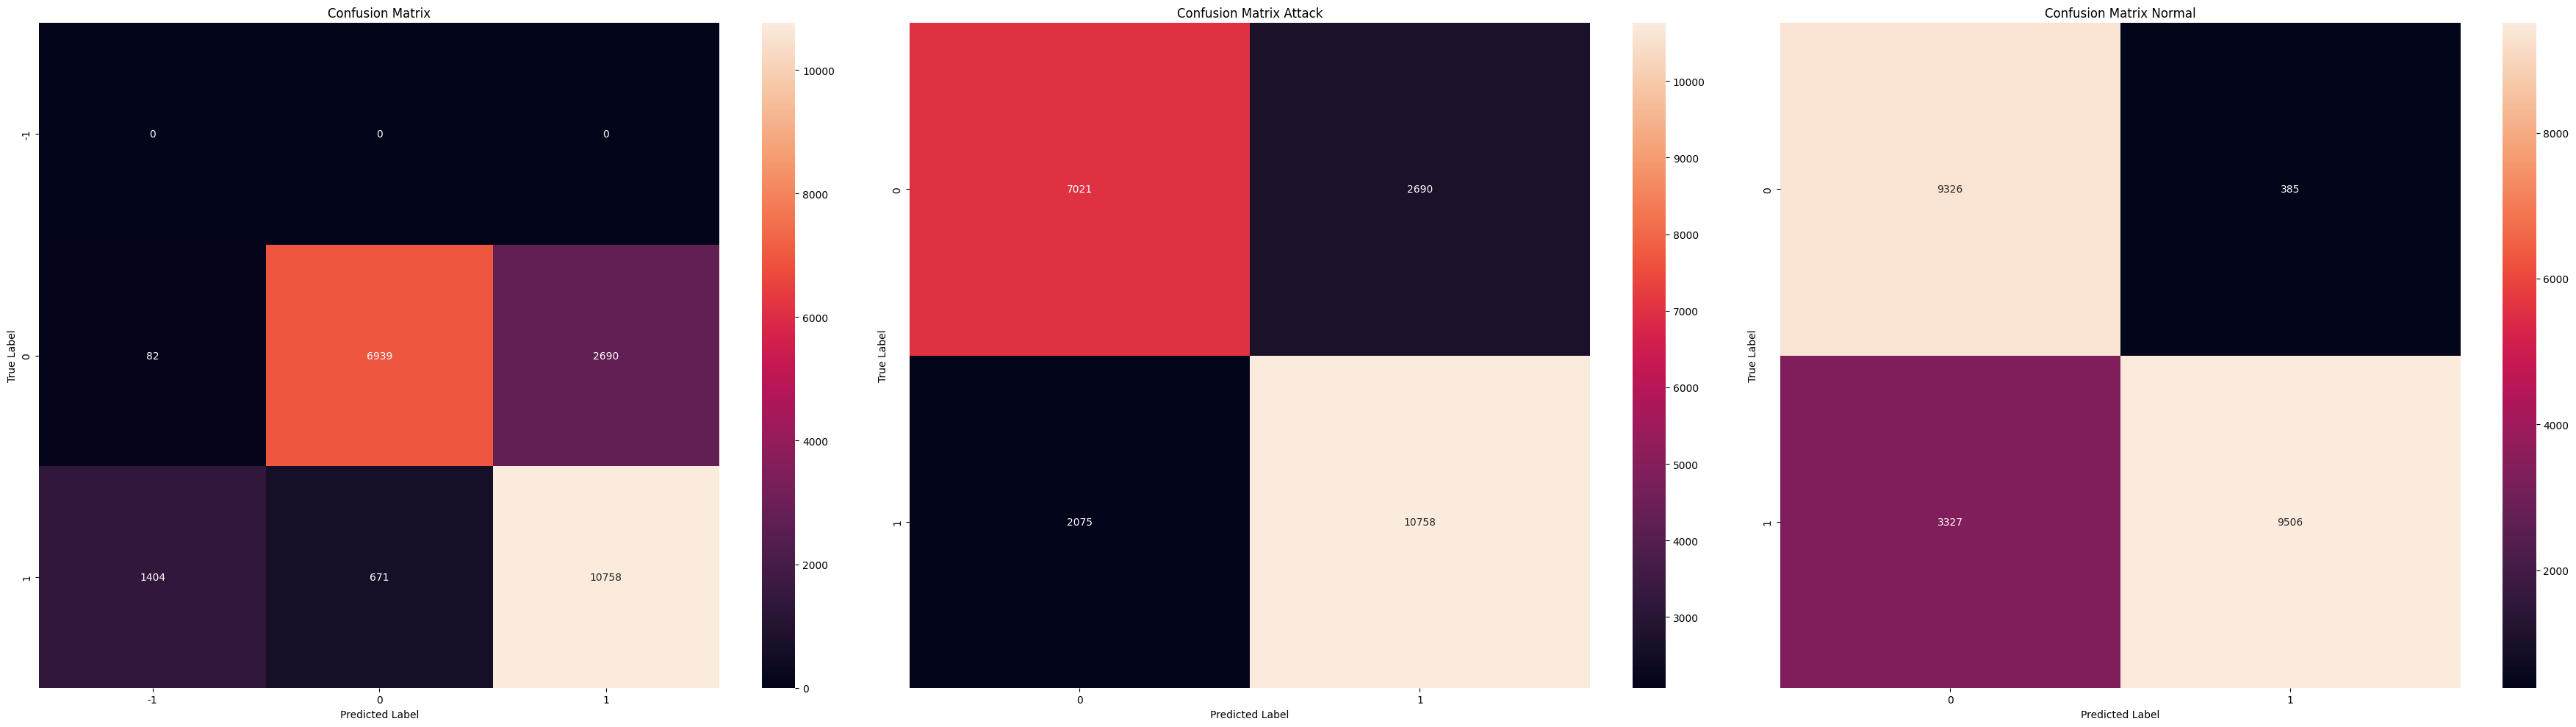

Accuracy: 0.41
Attack Accruracy: 0.43
Normal Accuracy: 0.75
F1 Score: 0.36
F1 Score Attack: 0.37
F1 Score Normal: 0.75
Fit Time: 4.24
Evaluate Time: 0.24


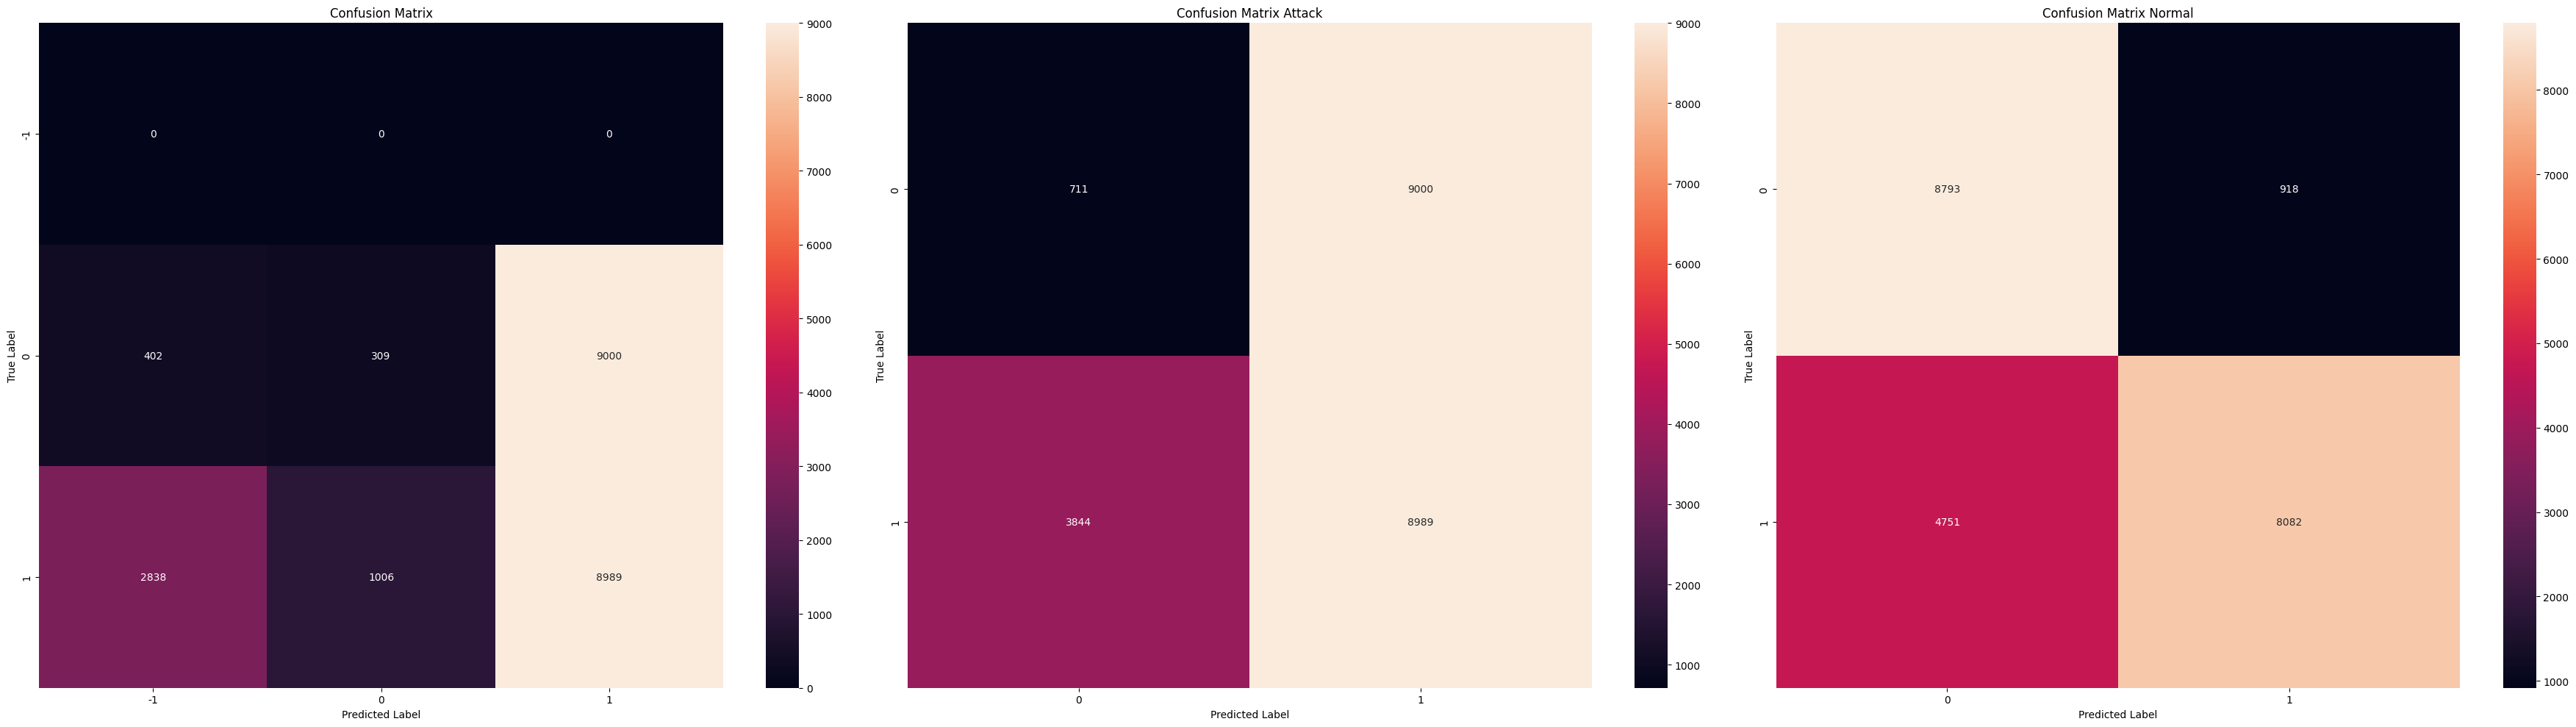

X_ohe shape is: 92
X_num shape is: 35


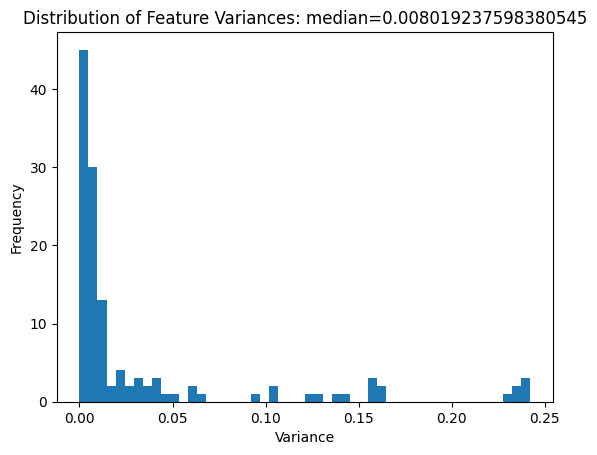

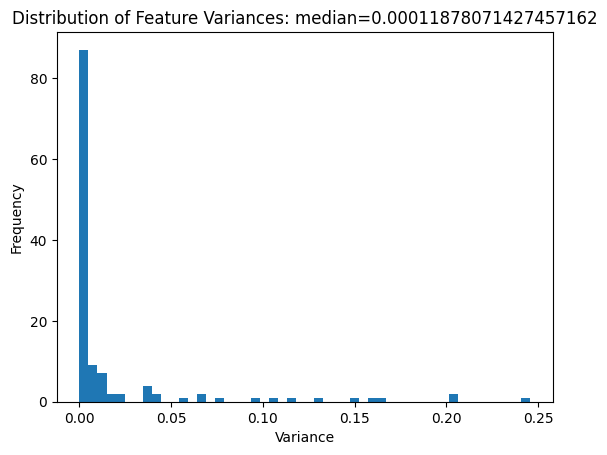

Accuracy: 0.7
Attack Accruracy: 0.73
Normal Accuracy: 0.8
F1 Score: 0.75
F1 Score Attack: 0.73
F1 Score Normal: 0.8
Fit Time: 1.77
Evaluate Time: 0.25


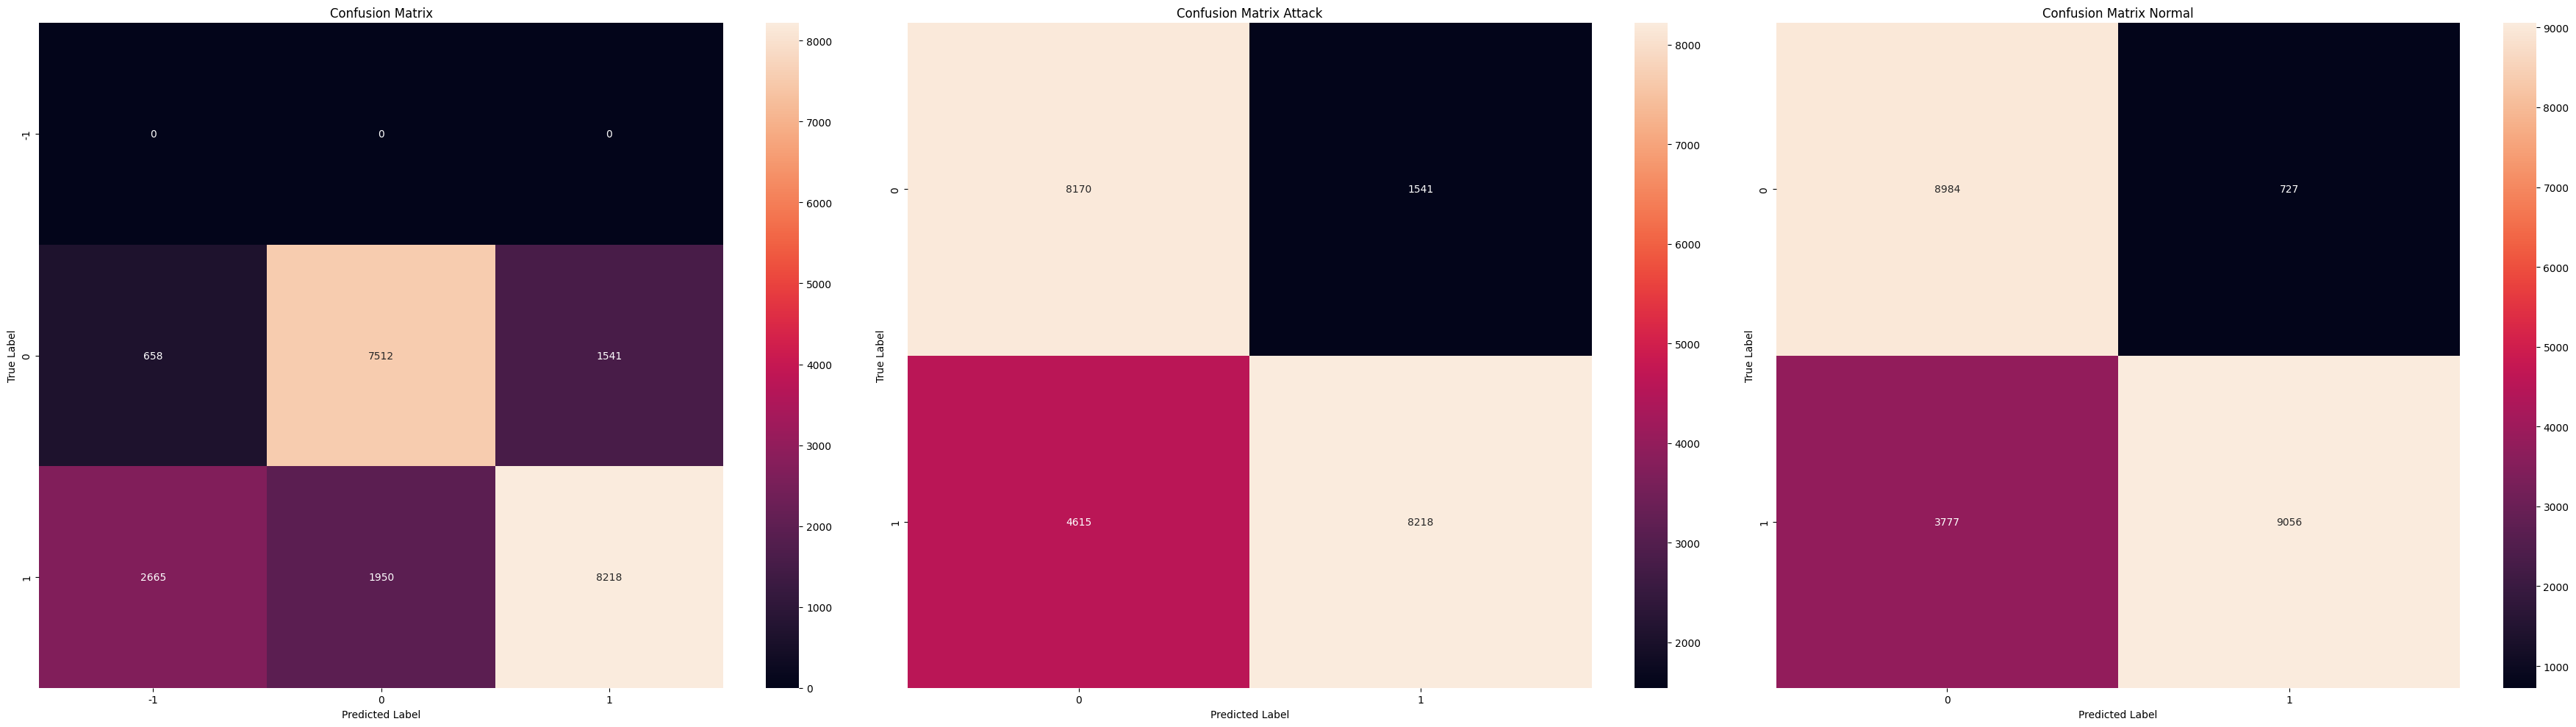

In [3]:
dataset = Dataset_NSL_KDD(1000000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=50000000000)
exp.run_hybrid(k=50000000000, n_fi=40, n_pca=20)
exp.run_var(k=500000000000)

Number of rows with inf: 368
X_ohe shape is: 25
X_num shape is: 64
Accuracy: 0.84
Attack Accruracy: 0.85
Normal Accuracy: 0.54
F1 Score: 0.87
F1 Score Attack: 0.87
F1 Score Normal: 0.65
Fit Time: 6.11
Evaluate Time: 3.16


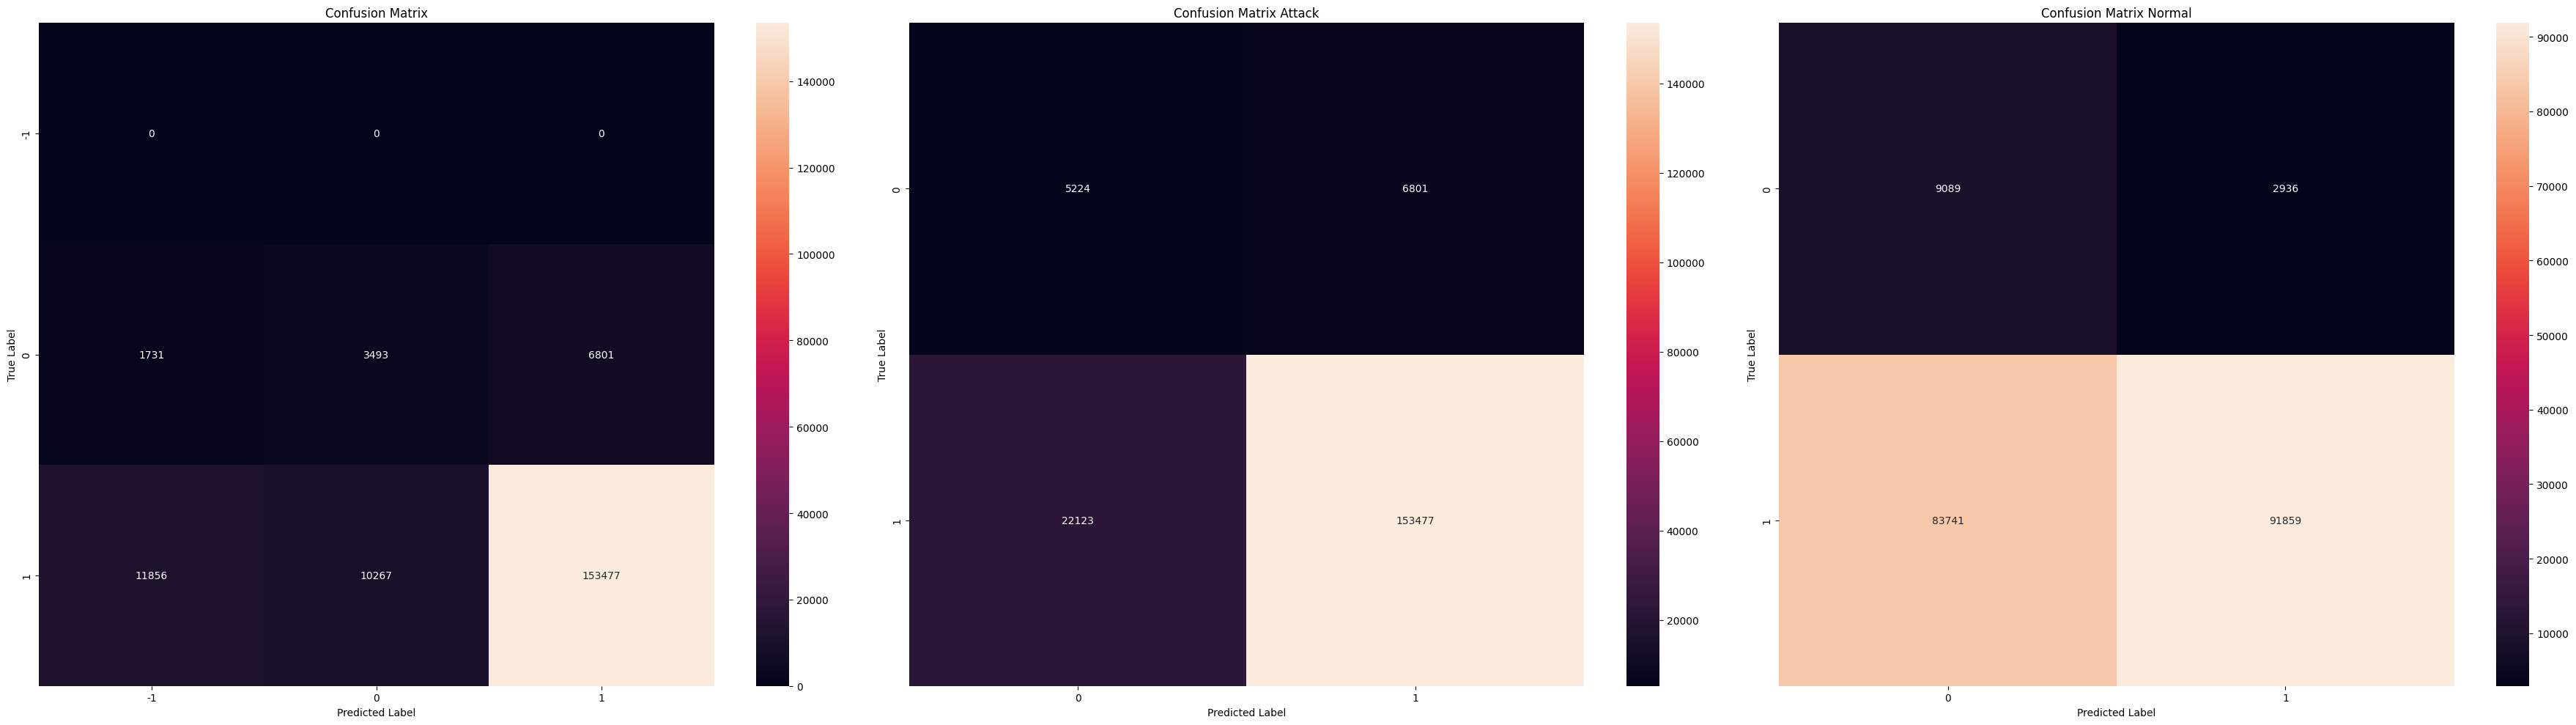

Accuracy: 0.83
Attack Accruracy: 0.84
Normal Accuracy: 0.58
F1 Score: 0.87
F1 Score Attack: 0.87
F1 Score Normal: 0.68
Fit Time: 10.36
Evaluate Time: 1.75


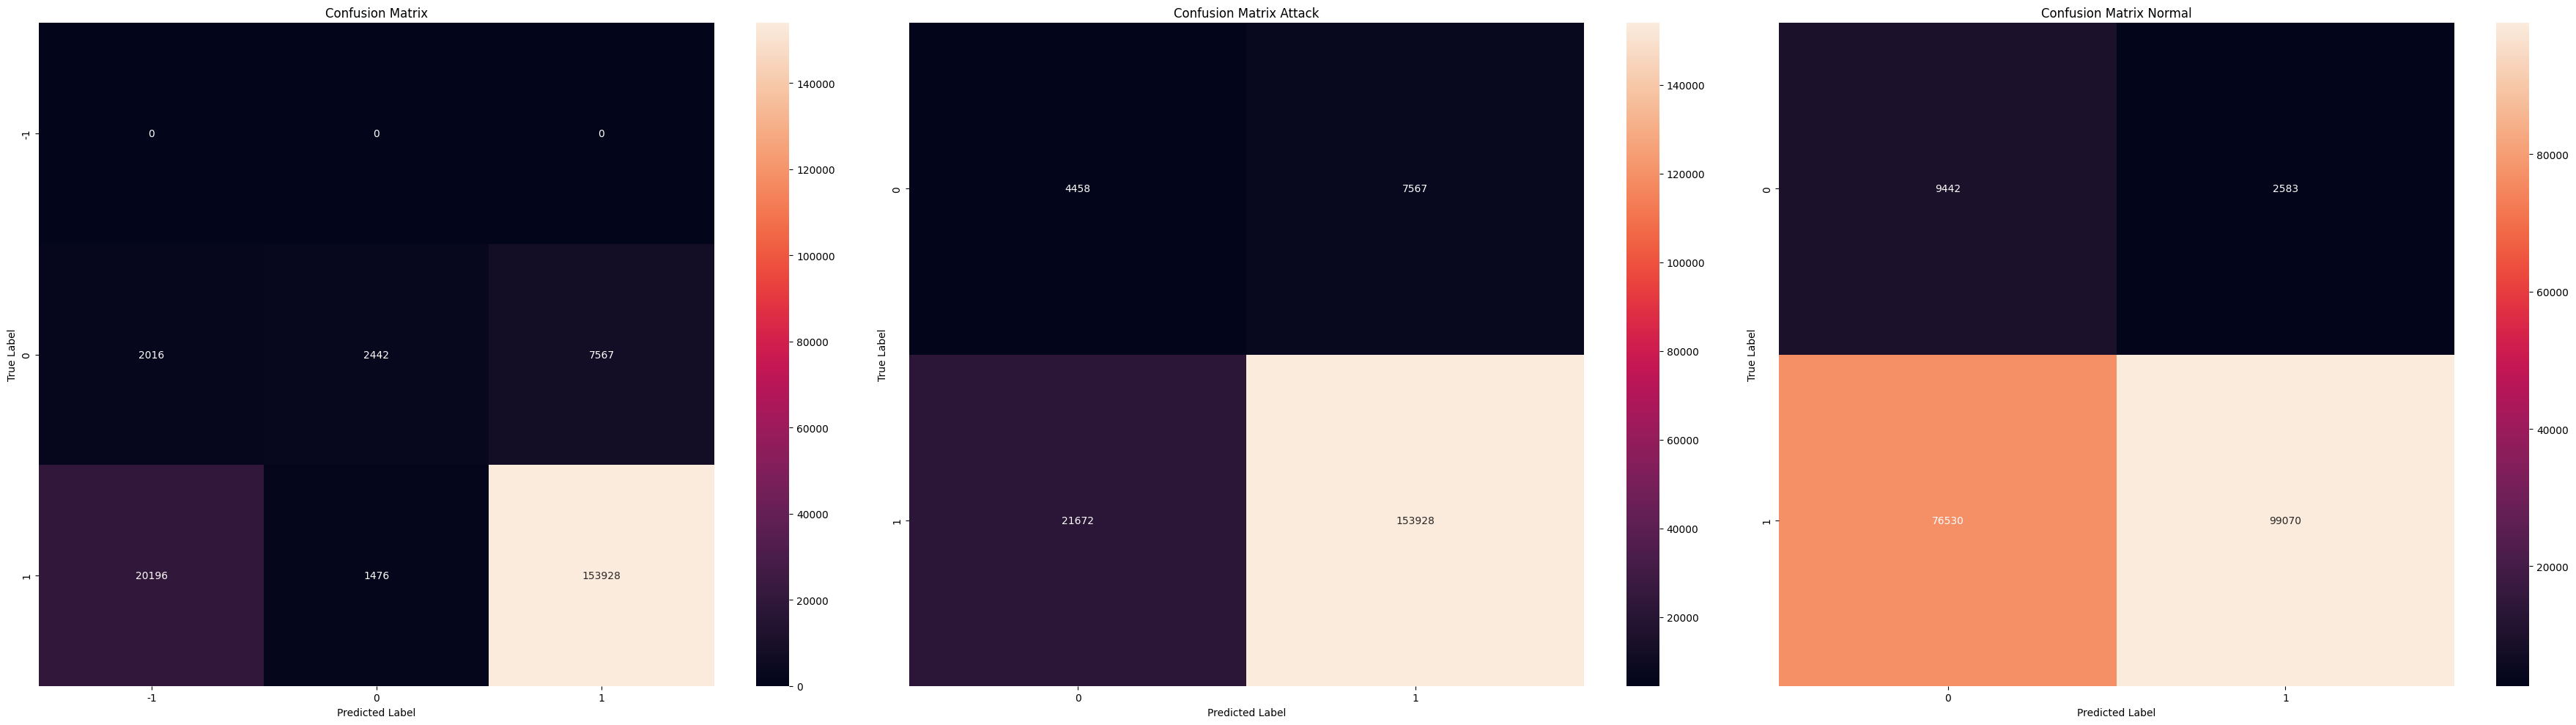

X_ohe shape is: 25
X_num shape is: 64


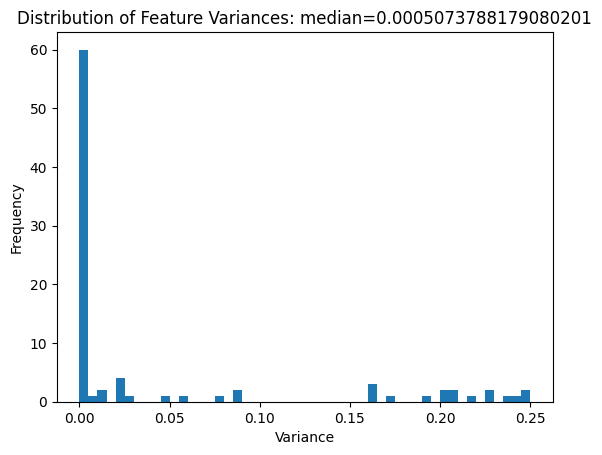

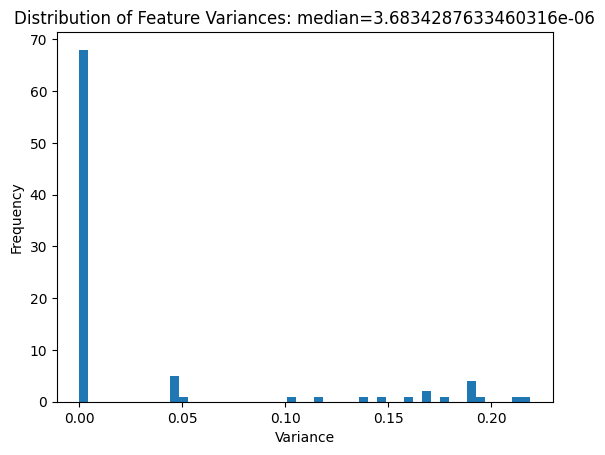

Accuracy: 0.79
Attack Accruracy: 0.81
Normal Accuracy: 0.83
F1 Score: 0.86
F1 Score Attack: 0.85
F1 Score Normal: 0.87
Fit Time: 6.68
Evaluate Time: 3.76


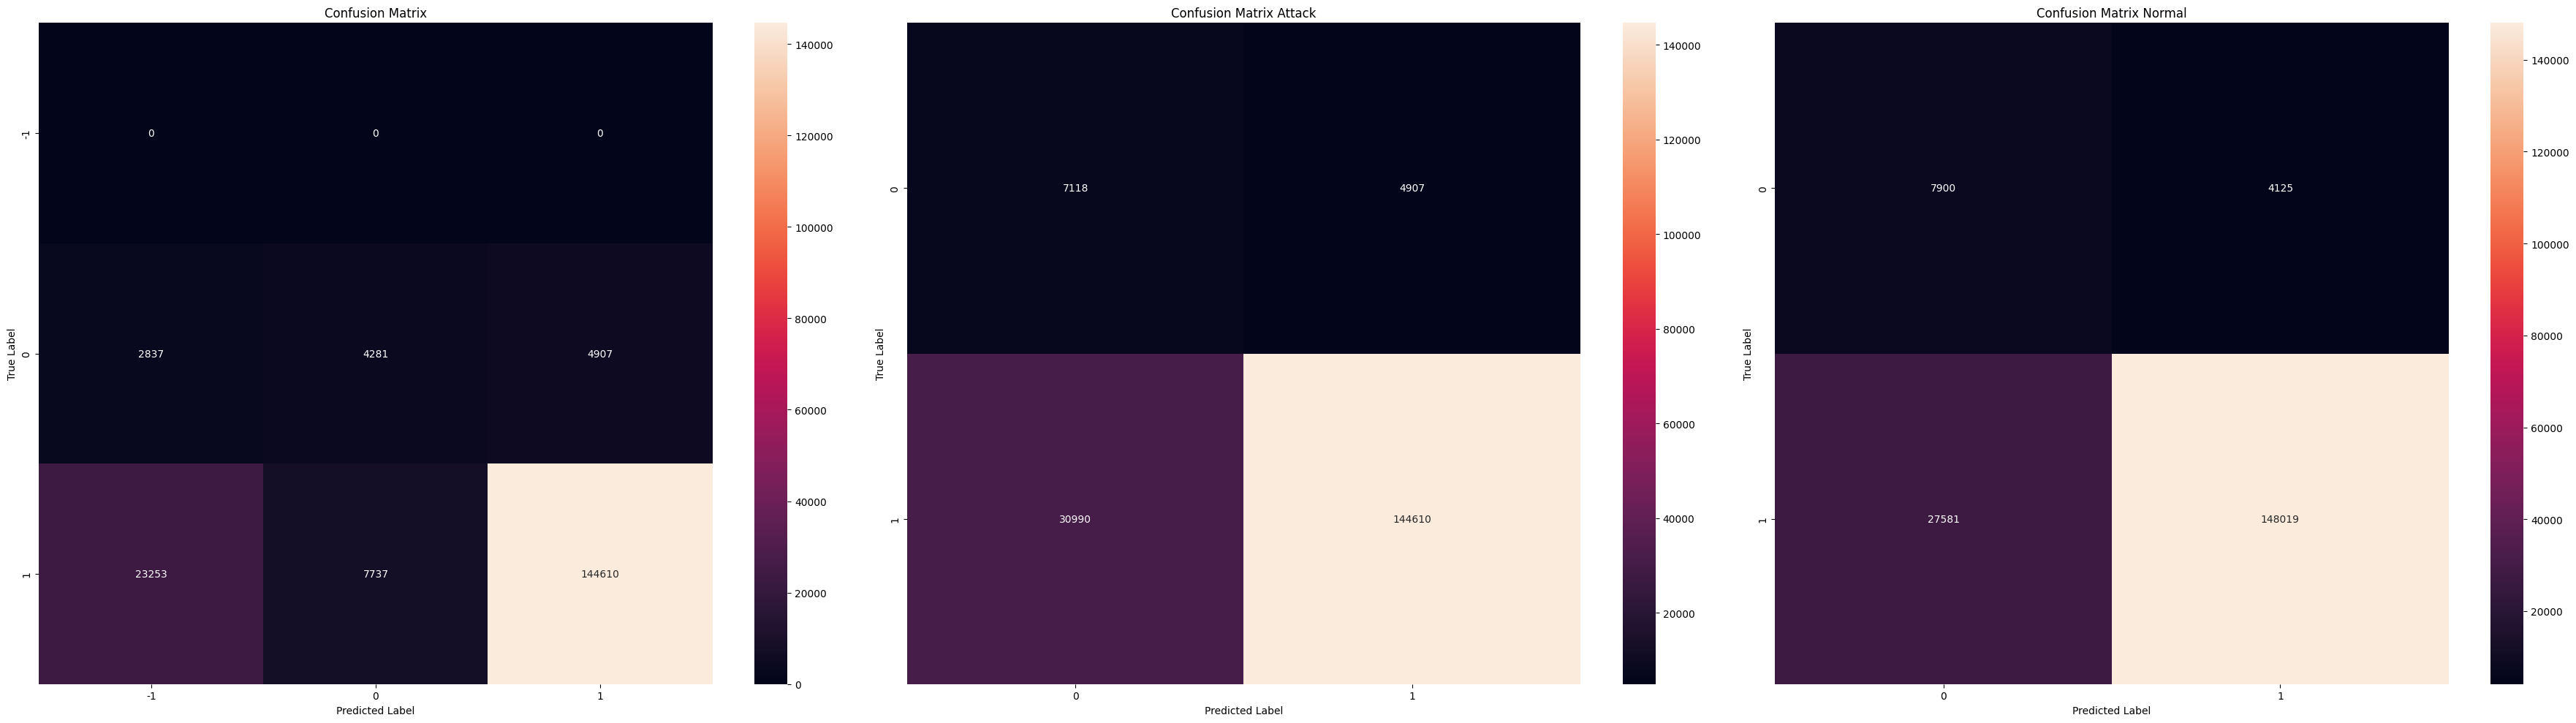

In [4]:
dataset = Dataset_IoT_NID(1000000000)
X_train, X_test, y_train, y_test, config = dataset.get_data()
exp = Experiment(X_train, X_test, y_train, y_test, config)
exp.run_noFS(k=5000000000)
exp.run_hybrid(k=5000000000, n_fi=10, n_pca=10)
exp.run_var(k=50000000000)